In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [8]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

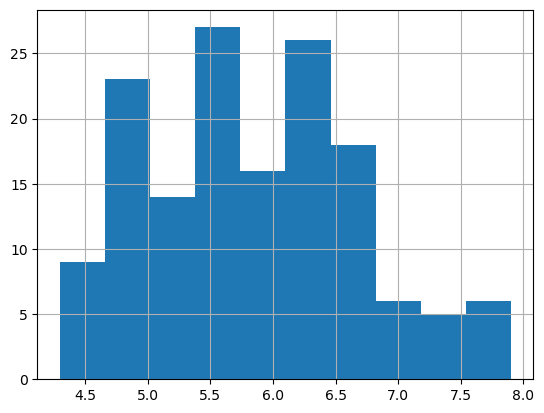

In [12]:
df['sepal_length'].hist()

<AxesSubplot:>

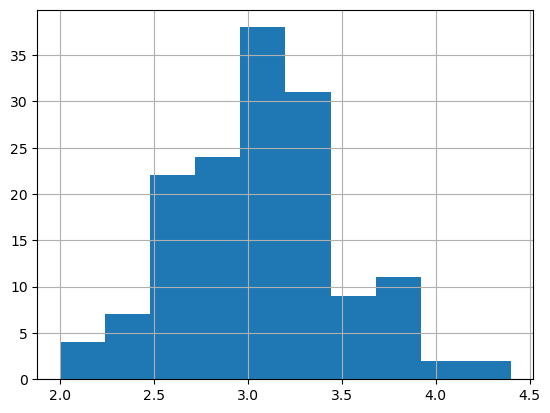

In [13]:
df['sepal_width'].hist()

<AxesSubplot:>

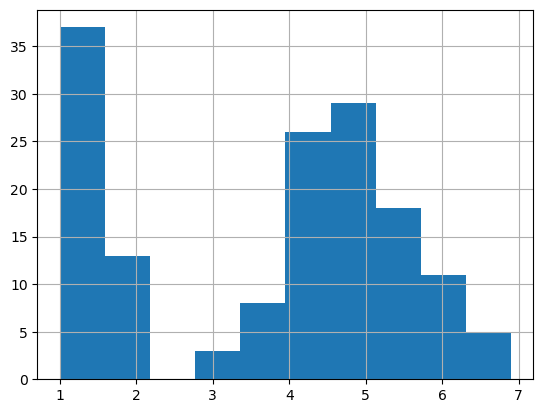

In [14]:
df['petal_length'].hist()

<AxesSubplot:>

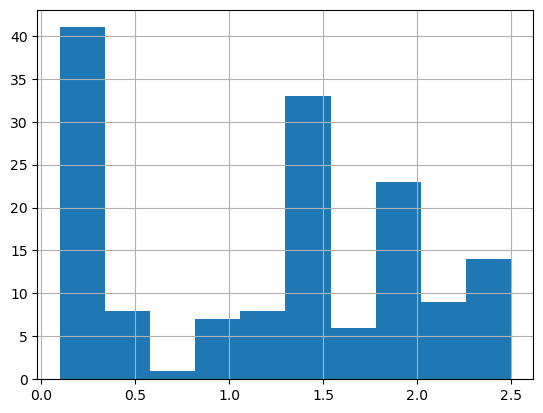

In [15]:
df['petal_width'].hist()

In [17]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

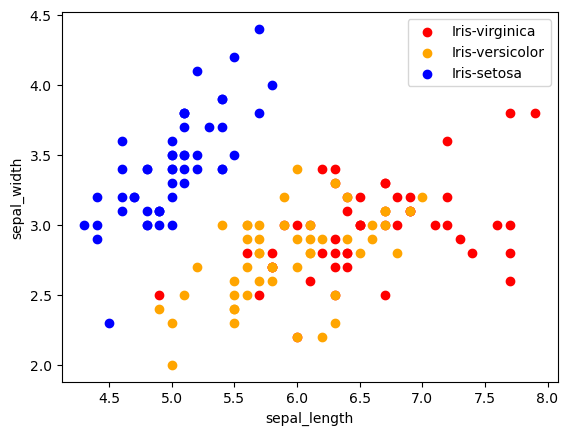

In [18]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

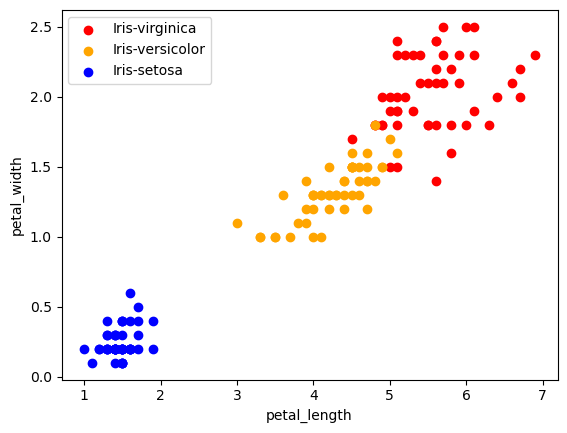

In [19]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

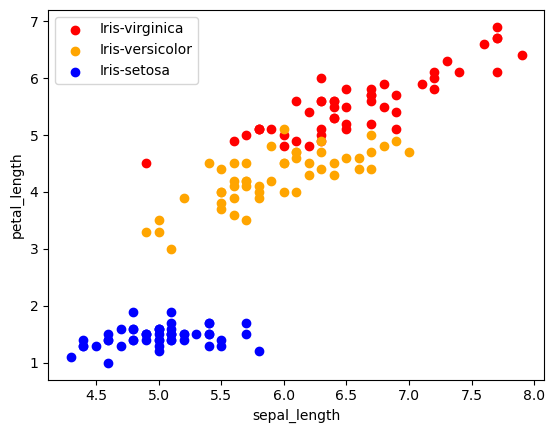

In [20]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()

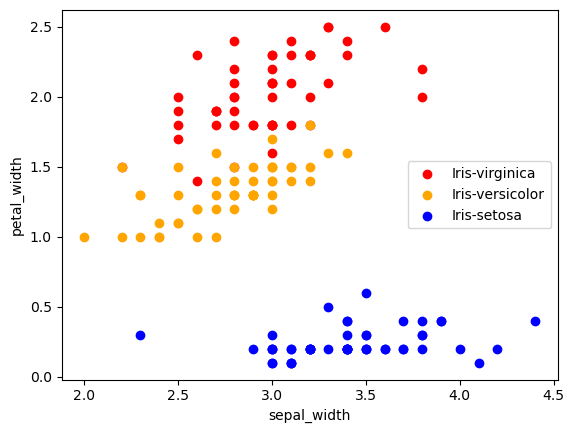

In [21]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.legend()

In [22]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

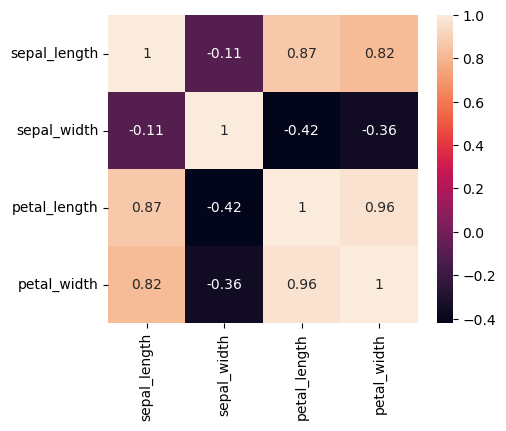

In [24]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [38]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [64]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [65]:
model.fit(x_train, y_train)

C:\Users\shanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [67]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [68]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [69]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


C:\Users\shanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [75]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [76]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [77]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0
